In [16]:
USE {
    repositories {
        maven("https://s01.oss.sonatype.org/content/repositories/releases")
        mavenCentral()
    }

    dependencies {
        implementation("dev.yidafu.jupyter:jupyter-js:0.5.0")
    }
}


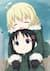

In [17]:
import javax.imageio.ImageIO
import java.io.File
import java.io.ByteArrayOutputStream
import java.util.Base64;

val testImage = ImageIO.read(File("girls-last-tour.jpg"))
val output = ByteArrayOutputStream();
ImageIO.write(testImage, "jpg", output);

val base64 = Base64.getEncoder().encodeToString(output.toByteArray());

val url = "data:image/jpg;base64," + base64

HTML("""
<img src="$url" />
""")

In [18]:
import java.awt.image.BufferedImage

fun BufferedImage.toMatrix(): Array<Array<Int>>  {
    var matrx: Array<Array<Int>> = Array(this.getWidth()) {
        Array(this.getHeight()) { 0 }
    }
    for (i in 0 until this.getWidth()) {
            for (j in 0 until this.getHeight()) {
                    matrx[i][j] = this.getRGB(i, j)
            }
    }
    return matrx
}

val matrix = testImage.toMatrix()

fun getChannel(trans: (argb: Int) -> Int): List<Triple<Int, Int, Int>> {
    val list = mutableListOf<Triple<Int, Int, Int>>()

    matrix.forEachIndexed { i, row ->
        row.forEachIndexed { j, rgb ->
             val b = trans(rgb)
            list.add(Triple(i, j, b))
        }
    }
    return list
}

val bList = getChannel { rgb -> rgb and 0xff }

var dataList = bList.map { arrayOf(it.first, it.second, it.third) }

In [22]:
%js

import { dataList } from '@jupyter';
import * as echarts from "echarts"

const chartDom = getCellRoot('800px', '600px');
chartDom.style="width:800px;height:600px;"

const myChart = echarts.init(chartDom);
myChart.setOption({
      tooltip: {},
      backgroundColor: '#fff',
      xAxis3D: {
        type: 'value'
      },
      yAxis3D: {
        type: 'value'
      },
      zAxis3D: {
        type: 'value',
        min: 0,
        max: 100
      },
      grid3D: {
        viewControl: {
          alpha: 20,
          beta: -30,
          projection: 'orthographic',
        },
        postEffect: {
          enable: true,
          SSAO: {
            enable: true
          }
        },
        boxDepth: 120,
        light: {
          main: {
            shadow: true,
            intensity: 2
          },
        },
      },
      series: [
        {
          type: 'bar3D',
          shading: 'realistic',
          barSize: 1,
          wireframe: {
            show: false
          },
          itemStyle: {
            color: function (params) {
              return 'rgb(0,' + params.data[2] + ',0)';
            }
          },
          data: dataList
        }
      ]
})